In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from __future__ import print_function

In [3]:
arr = np.load('perfmat1462227708.npy')

In [4]:
arr

array([[  8.43400000e+03,   5.40100000e+03,   5.62000000e+02,
          1.27000000e+02,   0.00000000e+00,   1.59000000e+02],
       [  3.84000000e+03,   3.24560000e+04,   6.21700000e+03,
          1.02600000e+03,   1.00000000e+00,   9.00000000e+02],
       [  6.15000000e+02,   1.35130000e+04,   1.15370000e+04,
          1.74400000e+03,   0.00000000e+00,   1.46600000e+03],
       [  1.48000000e+02,   3.57400000e+03,   5.76200000e+03,
          2.45400000e+03,   3.00000000e+00,   2.40500000e+03],
       [  3.80000000e+01,   1.28700000e+03,   2.19400000e+03,
          2.13200000e+03,   6.00000000e+00,   2.65000000e+03],
       [  2.30000000e+01,   8.24000000e+02,   9.43000000e+02,
          1.39400000e+03,   2.00000000e+00,   5.26500000e+03]], dtype=float32)

In [5]:
np.shape(arr)

(6, 6)

In [6]:
for i in range(6):
    for j in range(6):
        print('{:0.2e}  '.format(arr[i][j]), end='')
    print('')

8.43e+03  5.40e+03  5.62e+02  1.27e+02  0.00e+00  1.59e+02  
3.84e+03  3.25e+04  6.22e+03  1.03e+03  1.00e+00  9.00e+02  
6.15e+02  1.35e+04  1.15e+04  1.74e+03  0.00e+00  1.47e+03  
1.48e+02  3.57e+03  5.76e+03  2.45e+03  3.00e+00  2.40e+03  
3.80e+01  1.29e+03  2.19e+03  2.13e+03  6.00e+00  2.65e+03  
2.30e+01  8.24e+02  9.43e+02  1.39e+03  2.00e+00  5.26e+03  


In [7]:
ntot = np.sum(arr)

print('n total = {}'.format(ntot))
print('')

for i in range(6):
    print('{} hadrons sum: {}'.format(i, np.sum(arr[:,i])))

print('')
for i in range(6):
    print('{} hadrons fraction: {}'.format(i, np.sum(arr[:,i]) / ntot))

n total = 119102.0

0 hadrons sum: 13098.0
1 hadrons sum: 57055.0
2 hadrons sum: 27215.0
3 hadrons sum: 8877.0
4 hadrons sum: 12.0
5 hadrons sum: 12845.0

0 hadrons fraction: 0.109972961247
1 hadrons fraction: 0.479043185711
2 hadrons fraction: 0.228501617908
3 hadrons fraction: 0.0745327547193
4 hadrons fraction: 0.000100753975858
5 hadrons fraction: 0.107848733664


In [8]:
print(np.sum(arr))

119102.0


In [9]:
# adjust for wrong number of outputs
# arr = arr[0:6, 0:6]

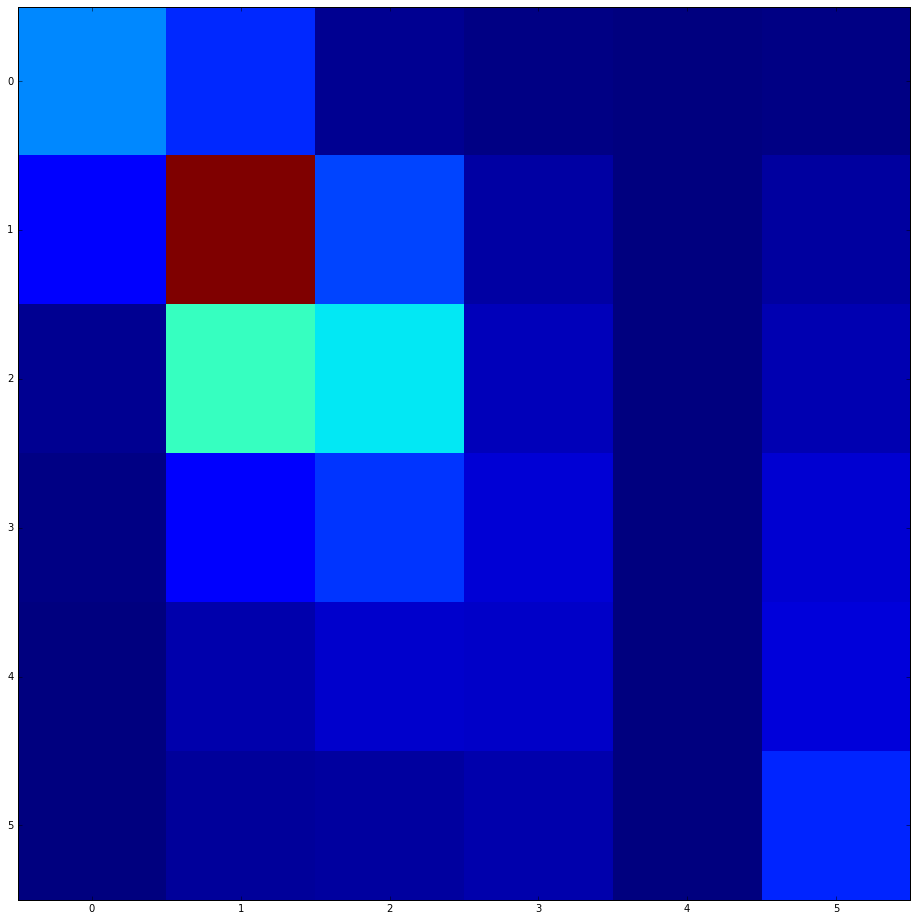

In [10]:
fig = plt.figure(figsize=(16,16))
plt.imshow(arr, cmap=plt.get_cmap('jet'), interpolation='nearest')

We row normalize (divide by `axis=1` to get the _purity_ - it is saying "okay, I reconstructed an event in target 1, did it really come from target 1?, etc."

In [11]:
pur = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    pur[i, :] = arr[i, :] / arr.sum(axis=1)[i]
    
for i in range(6):
    for j in range(6):
        print('{:0.3f}  '.format(pur[i][j]), end='')
    print('')

0.574  0.368  0.038  0.009  0.000  0.011  
0.086  0.730  0.140  0.023  0.000  0.020  
0.021  0.468  0.400  0.060  0.000  0.051  
0.010  0.249  0.402  0.171  0.000  0.168  
0.005  0.155  0.264  0.257  0.001  0.319  
0.003  0.098  0.112  0.165  0.000  0.623  


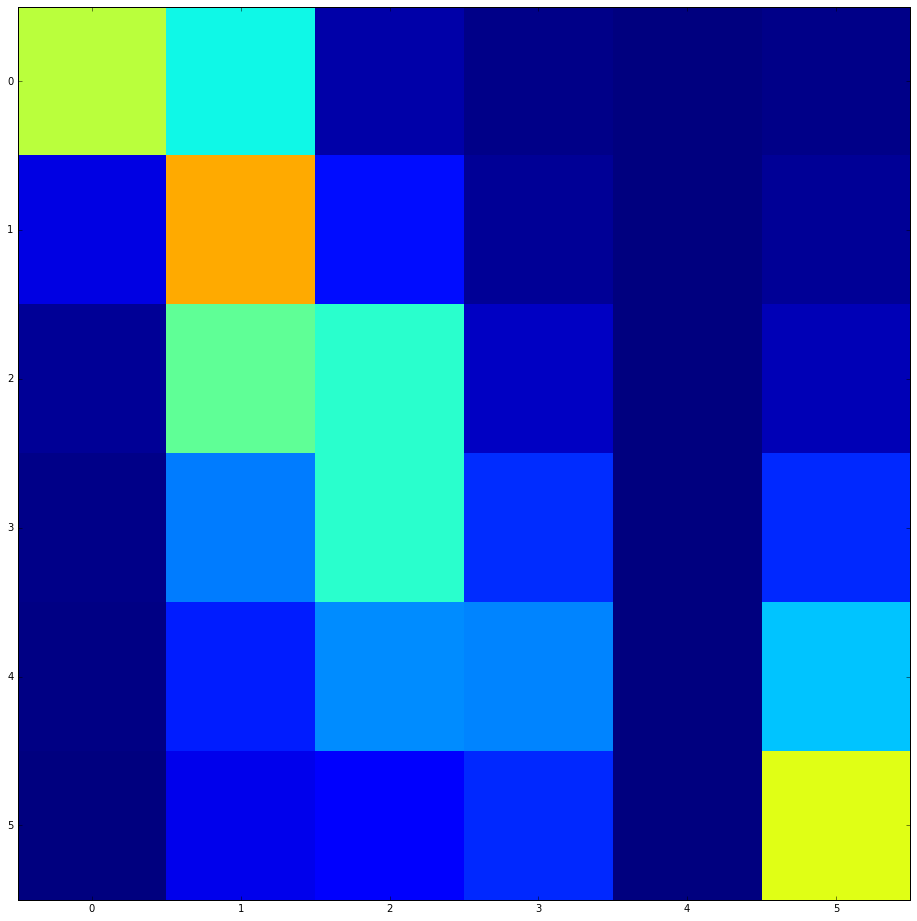

In [12]:
fig = plt.figure(figsize=(16,16))
plt.imshow(pur, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)

In [13]:
eff = np.zeros_like(arr)
for i in range(np.shape(arr)[0]):
    eff[:, i] = arr[:, i] / arr.sum(axis=0)[i]
    
for i in range(6):
    for j in range(6):
        print('{:0.3f}  '.format(eff[i][j]), end='')
    print('')

0.644  0.095  0.021  0.014  0.000  0.012  
0.293  0.569  0.228  0.116  0.083  0.070  
0.047  0.237  0.424  0.196  0.000  0.114  
0.011  0.063  0.212  0.276  0.250  0.187  
0.003  0.023  0.081  0.240  0.500  0.206  
0.002  0.014  0.035  0.157  0.167  0.410  


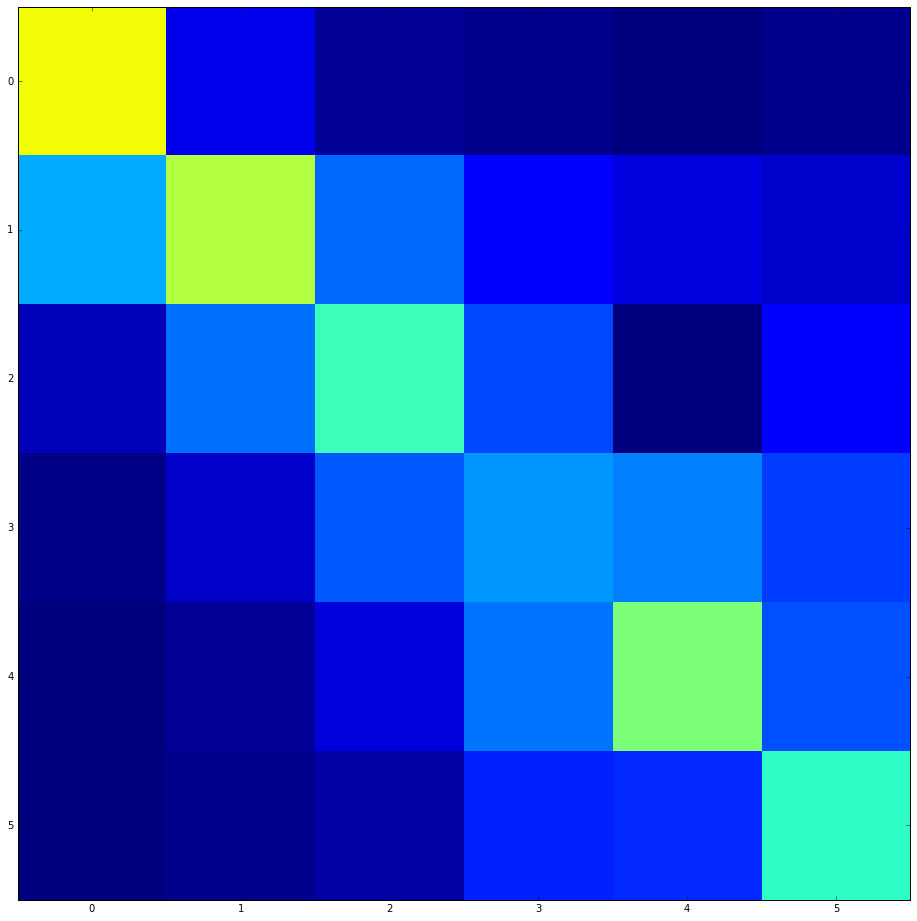

In [14]:
fig = plt.figure(figsize=(16,16))
plt.imshow(eff, cmap=plt.get_cmap('jet'), interpolation='nearest', vmin=0, vmax=1)